## Introduction to Pandas

In this tutorial we download real data from NYC open data through API and analyse the data in Pandas. We cover the base Pandas functions, visualize data and make small assignment in pairs.

In [62]:
import requests
import datetime
import time

In [136]:
import requests




In [139]:
pd.DataFrame(data)['created_date'].min()

'2017-03-13T20:59:19.000'

In [140]:
def get_complaints():
    
    """Get data about complaints from NYC Open data"""
    
    url = "http://data.cityofnewyork.us/resource/fhrw-4uyv.json?$$app_token=FfobI56OJyyKtJvlMf9YGiH3P"

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
    return data

So, we are going to load the 311 CSV file using the read_csv function. It will automatically detect that the first row contains the column labels, but we need to explicitly tell read_csv that the row labels are contained in column Unique Key

In [9]:
complaints = pd.read_csv('311-service-requests.csv', index_col='Unique Key')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


complaints is a DataFrame. You can think of it as containing a table representing the data in the file. To see the part of dataset, use function head()

In [77]:
complaints.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_timestamp,created_hour,created_month,created_day
Unique Key,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)",1.383171e+09,2,10,3
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)",1.383170e+09,2,10,3
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)",1.383170e+09,2,10,3
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)",1.383170e+09,1,10,3
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)",1.383170e+09,1,10,3


In [63]:
complaints['created_timestamp'] = complaints.apply(lambda x: time.mktime(datetime.datetime.strptime(x['Created Date'], "%m/%d/%Y %H:%M:%S %p").timetuple()), axis = 1)

In [76]:
complaints['created_hour'] = complaints.apply(lambda x: datetime.datetime.fromtimestamp(x['created_timestamp']).hour, axis = 1)
complaints['created_month'] = complaints.apply(lambda x: datetime.datetime.fromtimestamp(x['created_timestamp']).month, axis = 1)
complaints['created_day'] = complaints.apply(lambda x: datetime.datetime.fromtimestamp(x['created_timestamp']).weekday(), axis = 1)

head() function returns first 5 rows of Dataframe. If it is necessary to print more than 5 rows, pass number of rows as an argument to head()

Function tail() prints last 5 rows of Dataframe 

In [88]:
complaints.tail(10)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_timestamp,created_hour,created_month,created_day
Unique Key,,,,,,,,,,,,,,,,,,,,,
26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003,99 2 AVENUE,2 AVENUE,...,NaN,NaN,NaN,40.727251,-73.988660,"(40.727251287038676, -73.98866028603422)",1.380874e+09,12,10,4
26434084,10/04/2013 12:04:00 AM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10036,NaN,NaN,...,NaN,NaN,NaN,40.760405,-73.987474,"(40.76040500039782, -73.98747426235285)",1.380874e+09,12,10,4
26426164,10/04/2013 12:03:00 AM,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11106,30-09 BROADWAY,BROADWAY,...,NaN,NaN,NaN,40.762279,-73.926013,"(40.762278541098084, -73.92601303458156)",1.380874e+09,12,10,4
26439710,10/04/2013 12:03:00 AM,10/04/2013 12:03:00 AM,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10022,325 EAST 54 STREET,EAST 54 STREET,...,NaN,NaN,NaN,40.757069,-73.965933,"(40.75706852462872, -73.96593314322774)",1.380874e+09,12,10,4
26435569,10/04/2013 12:02:00 AM,10/04/2013 01:10:00 AM,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10022,311 EAST 50 STREET,EAST 50 STREET,...,NaN,NaN,NaN,40.754662,-73.967992,"(40.75466197318078, -73.96799173864807)",1.380874e+09,12,10,4
26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.380874e+09,12,10,4
26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,NaN,...,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)",1.380874e+09,12,10,4
26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)",1.380874e+09,12,10,4
26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)",1.380874e+09,12,10,4


We can get some statistics over DataFrame in one short command:

In [106]:
complaints.describe()

,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
count,9.814300e+04,98143.000000,0.0,98143.000000,98143.000000,1.110690e+05,111069.000000,111069.0,111069.000000
mean,1.004544e+06,205553.153287,NaN,40.730821,-73.926738,1.382086e+09,8.700763,10.0,2.503372
std,2.206087e+04,31334.677543,NaN,0.086006,0.079563,6.762386e+05,3.839348,0.0,1.832793
min,9.134950e+05,121152.000000,NaN,40.498949,-74.254437,1.380834e+09,1.000000,10.0,0.000000
25%,9.920490e+05,182506.000000,NaN,40.667529,-73.971882,1.381450e+09,6.000000,10.0,1.000000
50%,1.003205e+06,203251.000000,NaN,40.724521,-73.931580,1.382141e+09,10.000000,10.0,2.000000
75%,1.016823e+06,233366.000000,NaN,40.807183,-73.882430,1.382662e+09,12.000000,10.0,4.000000
max,1.067024e+06,271485.000000,NaN,40.911792,-73.701278,1.383210e+09,12.000000,10.0,6.000000


We can access an individual column using square brackets. This returns a Series object, which represents a one-dimensional labelled array. In this case, the array is labelled by Unique Key. Also we can select subsets of the rows by indexing:


In [33]:
complaints['Complaint Type'][:10]

Unique Key
26589651    Noise - Street/Sidewalk
26593698            Illegal Parking
26594139         Noise - Commercial
26595721            Noise - Vehicle
26590930                     Rodent
26592370         Noise - Commercial
26595682           Blocked Driveway
26595195         Noise - Commercial
26590540         Noise - Commercial
26594392         Noise - Commercial
Name: Complaint Type, dtype: object

However, if we select multiple columns, we get back a DataFrame:

In [34]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
Unique Key,,
26589651,Noise - Street/Sidewalk,QUEENS
26593698,Illegal Parking,QUEENS
26594139,Noise - Commercial,MANHATTAN
26595721,Noise - Vehicle,MANHATTAN
26590930,Rodent,MANHATTAN
26592370,Noise - Commercial,QUEENS
26595682,Blocked Driveway,QUEENS
26595195,Noise - Commercial,QUEENS
26590540,Noise - Commercial,MANHATTAN


We can access an individual row using its index:

In [35]:
complaints.loc[26589651]

Created Date                                       10/31/2013 02:08:41 AM
Closed Date                                                           NaN
Agency                                                               NYPD
Agency Name                               New York City Police Department
Complaint Type                                    Noise - Street/Sidewalk
Descriptor                                                   Loud Talking
Location Type                                             Street/Sidewalk
Incident Zip                                                        11432
Incident Address                                         90-03 169 STREET
Street Name                                                    169 STREET
Cross Street 1                                                  90 AVENUE
Cross Street 2                                                  91 AVENUE
Intersection Street 1                                                 NaN
Intersection Street 2                 

Or by its row number:

In [36]:
complaints.iloc[0]

Created Date                                       10/31/2013 02:08:41 AM
Closed Date                                                           NaN
Agency                                                               NYPD
Agency Name                               New York City Police Department
Complaint Type                                    Noise - Street/Sidewalk
Descriptor                                                   Loud Talking
Location Type                                             Street/Sidewalk
Incident Zip                                                        11432
Incident Address                                         90-03 169 STREET
Street Name                                                    169 STREET
Cross Street 1                                                  90 AVENUE
Cross Street 2                                                  91 AVENUE
Intersection Street 1                                                 NaN
Intersection Street 2                 

Quick aside: if we don't specify an index column, then row number becomes the index column.

The value_counts method will tally up the number of times a value appears in a column, and will return a Series with the counts, in descending order. 

In [37]:
complaints['Complaint Type'].value_counts()[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

## Pandas visualization

We can also do some plotting of the data without much effort:

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

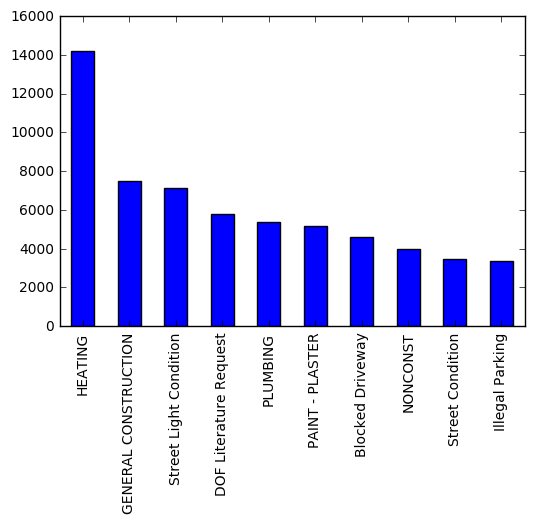

In [27]:
ctcounts[:10].plot("bar")

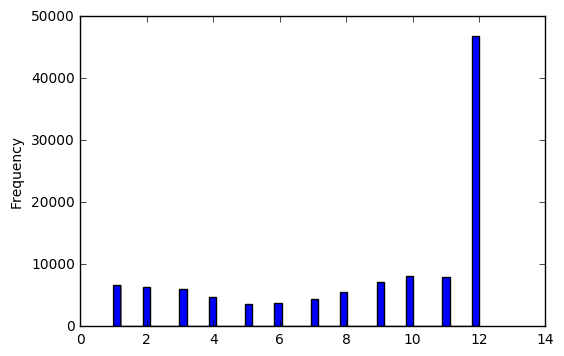

In [105]:
complaints['created_hour'].plot('hist', bins=50)

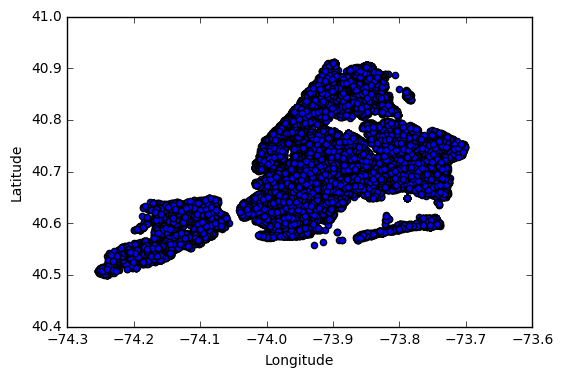

In [29]:
complaints.plot(kind='scatter', x='Longitude', y='Latitude')

## Exersices

How can we find the earliest created date in DataFrame?

In [86]:
complaints['Created Date'].min()

'10/04/2013 01:00:00 PM'

How can we find the latest created date in DataFrame?

In [ ]:
complaints['Created Date'].max()

How can we print just the column containing street names?

In [115]:
complaints['Street Name'][:5]

Unique Key
26589651         169 STREET
26593698          58 AVENUE
26594139           BROADWAY
26595721     WEST 72 STREET
26590930    WEST 124 STREET
Name: Street Name, dtype: object

How can we get a list of the location types in the DataFrame, without duplicates?

In [ ]:
complaints['Location Type'].unique()

What is the largest NYC Agency responsible for complaints?

In [116]:
complaints['Agency Name'].value_counts()[:1]

Department of Housing Preservation and Development    39067
Name: Agency Name, dtype: int64

How can we compute number of complaints per hour?

In [ ]:
complaints['created_hour'].value_counts()

How can we compute a Boolean array indicating whether the Agency is 'DEP'?

In [117]:
complaints['Agency'] == 'DEP'

Unique Key
26589651    False
26593698    False
26594139    False
26595721    False
26590930    False
26592370    False
26595682    False
26595195    False
26590540    False
26594392    False
26595176    False
26591982    False
26594169    False
26594391    False
26590917    False
26591458    False
26594086    False
26595117    False
26590389    False
26594210    False
26592932    False
26594152    False
26589678    False
26592304    False
26591892    False
26591573    False
26590509    False
26591379    False
26594085    False
26589201    False
            ...  
26428764    False
26426166    False
26438565     True
26428990    False
26432659    False
26426096    False
26437764     True
26436286     True
26428989    False
26430030    False
26429663    False
26437763     True
26432955    False
26437035     True
26433197    False
26426060    False
26430628    False
26431648    False
26437034     True
26426094    False
26429040    False
26434084     True
26426164    False
26439710     True

complaints['created_hour'].value_counts()

How can we create a new DataFrame containing only the 'DEP' records? Print 5 last rows of this new DataFrame

df_new = complaints[complaints['Agency'] == 'DEP']
df_new.tail()

How can we use row and column indexing to set the status to closed in the second row of DataFrame?

df_new.loc[2, 'Status'] = 'Closed'

How can we use row and column indexing to append a new record for DataFrame with 'DEP'?

df_new.loc[2, 'Status'] = 'Closed'

How can we print the DataFrame, sorted by Status and by Complaint type?

complaints.sort_values(by=['Status', 'Complaint Type'])

How can we find the boroughs with most complaints about illegal parking at 9am?

This solution uses an & operator to set two conditions that must both be met:

complaints['Borough'][(complaints['Complaint Type'] == 'Illegal Parking') & (complaints['created_hour'] == 9)].value_counts()

To see the size of DataFrame

complaints.shape

Print all DataFrame columns

complaints.columns

complaints.dtypes